In [1]:
%matplotlib inline
import sys
import copy
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib
#matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt

import pcse
from pcse.models import Wofost72_WLP_FD
from kalmanWoFost import KalmanWofostDA
from dataproviders import parameters, agromanagement, weather
import seaborn as sns



Démo : filtre de Kalman progressif

In [2]:
variables_for_DA = ["LAI", "SM"]
dates_of_observation = [dt.date(2000,2,7), dt.date(2000,2,28), dt.date(2000,3,20), 
                        dt.date(2000,4,10), dt.date(2000,5,1)]
observed_lai = np.array([2.2, 3.5, 6.2, 3.3, 2.1])
std_lai = observed_lai * 0.1 # Std. devation is estimated as 10% of observed value                                                                 
observed_sm = np.array([0.285, 0.26, 0.28, 0.18, 0.17])
std_sm = observed_sm * 0.05 # Std. devation is estimated as 5% of observed value
observations_for_DA = []
# Pack them into a convenient format
observations_for_DA = [(d, {"LAI": (lai, errlai), "SM": (sm, errsm)}) for d, lai, errlai, sm, errsm in zip(dates_of_observation, observed_lai, std_lai, observed_sm, std_sm)]

[KalmanWoFoStDA] Assimilating data for {'LAI': (2.2, 0.22000000000000003), 'SM': (0.285, 0.014249999999999999)} on day 2000-02-07 
[KalmanWoFoStDA] Assimilating data for {'LAI': (3.5, 0.35000000000000003), 'SM': (0.26, 0.013000000000000001)} on day 2000-02-28 
[KalmanWoFoStDA] Assimilating data for {'LAI': (6.2, 0.6200000000000001), 'SM': (0.28, 0.014000000000000002)} on day 2000-03-20 
[KalmanWoFoStDA] Assimilating data for {'LAI': (3.3, 0.33), 'SM': (0.18, 0.009)} on day 2000-04-10 
[KalmanWoFoStDA] Assimilating data for {'LAI': (2.1, 0.21000000000000002), 'SM': (0.17, 0.0085)} on day 2000-05-01 
50
[KalmanWoFoStDA] Displaying data for 50 up to day None 


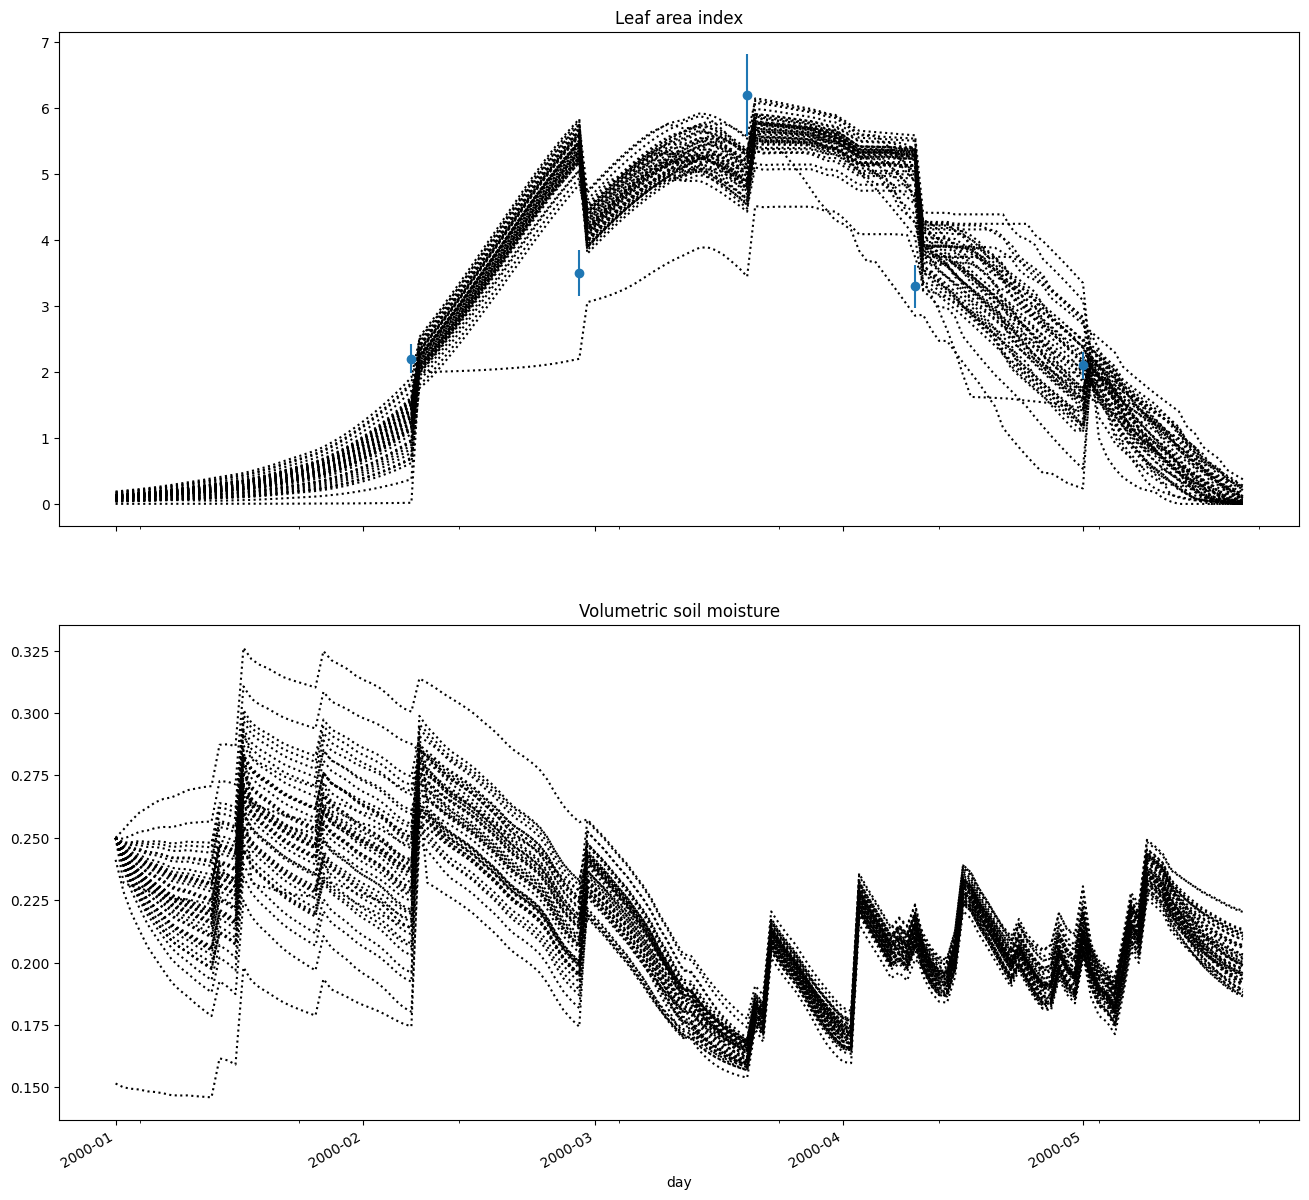

In [4]:
override_parameters = {}
# Initial conditions
ensemble_size=50
override_parameters["TDWI"] = np.random.normal(150., 50., (ensemble_size))
override_parameters["WAV"] = np.random.normal(4.5, 1.5, (ensemble_size))
# parameters
override_parameters["SPAN"] = np.random.normal(31, 3 ,(ensemble_size))
override_parameters["SMFCF"] = np.random.normal(0.31, 0.03 ,(ensemble_size))

k = KalmanWofostDA(ensemble_size=ensemble_size, 
                   parameters=parameters, weather=weather, 
                   agromanagement=agromanagement, override_parameters=override_parameters)

for obs in observations_for_DA:
    k.assimilate(obs)
print(len(k.ensemble))
k.moveForward(20)
k.displayLAIsM()

Démo: génération de données

parameters edited in ['p']


AttributeError: module 'seaborn' has no attribute 'show'

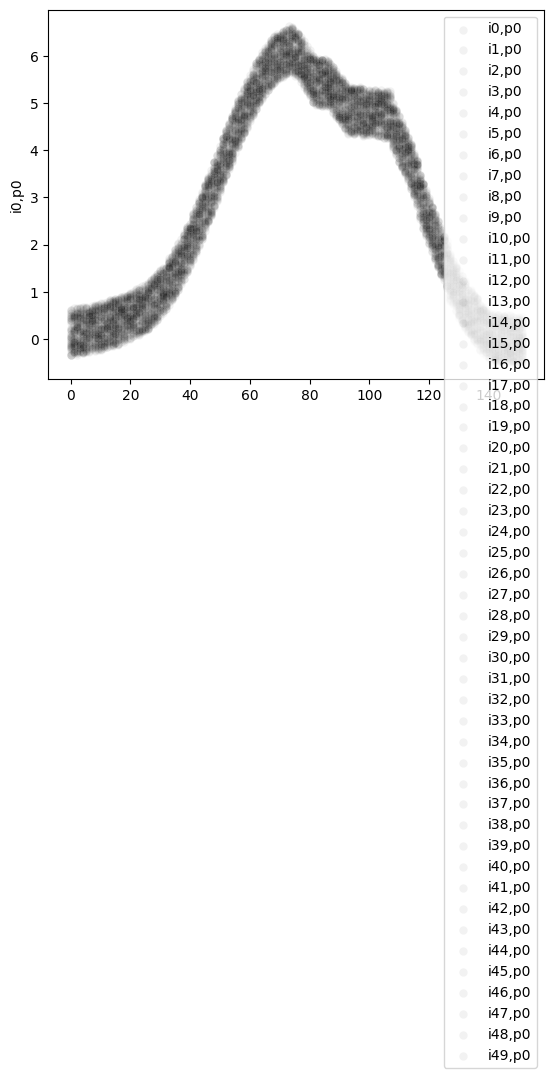

In [5]:
import data_gen
from matplotlib import pyplot as plt
my_model = data_gen.DataGenerator(randomness=1)
my_data = my_model.generateLargeDataTimeSeries(nbOfIter=50,nb_points=200)

for col in my_data.columns:
    sns.scatterplot(x=range(len(my_data[col])),y=my_data[col],label=col,color='black',alpha=0.05)
sns.show()

